<a href="https://colab.research.google.com/github/ChaelinL/Deeplearning_for_everyone/blob/main/4%2C%205%EC%9E%A5%20%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최적의 선 구하기
다음 두 가지 방법을 이용해 주어진 데이터에 맞는 최적의 선 구하기




In [ ]:
import numpy as np
# 데이터
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

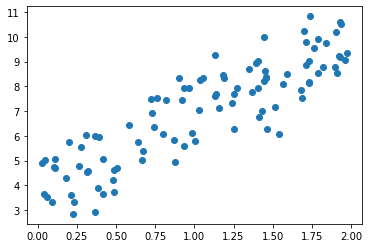

In [ ]:
# 시각화
import matplotlib.pyplot as plt
plt.scatter(x, y);

## 1. 공식 이용

In [ ]:
mx = np.mean(x)
my = np.mean(y)

divisor = sum([(i-mx)**2 for i in x])

def top(x, mx, y, my):
  d = 0
  for i in range(len(x)):
    d+=(x[i]-mx)*(y[i]-my)
  return d
dividend = top(x, mx, y, my)

a = dividend/divisor
b = my - (mx*a)

print(f"기울기: {round(a[0],3)}, y절편: {round(b[0],3)}")


기울기: 2.951, y절편: 3.904


## 2. 경사하강법 이용

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(1, input_dim=1, activation='linear'))
model.compile(optimizer='sgd', loss='mse')

model.fit(x, y, epochs=2000)

Epoch 1/2000
4/4 [==============================] - 0s 3ms/step - loss: 71.4849
Epoch 2/2000
4/4 [==============================] - 0s 4ms/step - loss: 50.1700
Epoch 3/2000
4/4 [==============================] - 0s 3ms/step - loss: 35.1100
Epoch 4/2000
4/4 [==============================] - 0s 3ms/step - loss: 23.8742
Epoch 5/2000
4/4 [==============================] - 0s 4ms/step - loss: 16.4339
Epoch 6/2000
4/4 [==============================] - 0s 3ms/step - loss: 11.3915
Epoch 7/2000
4/4 [==============================] - 0s 4ms/step - loss: 8.2717
Epoch 8/2000
4/4 [==============================] - 0s 3ms/step - loss: 6.0161
Epoch 9/2000
4/4 [==============================] - 0s 3ms/step - loss: 4.2533
Epoch 10/2000
4/4 [==============================] - 0s 3ms/step - loss: 3.2654
Epoch 11/2000
4/4 [==============================] - 0s 4ms/step - loss: 2.4094
Epoch 12/2000
4/4 [==============================] - 0s 3ms/step - loss: 1.9965
Epoch 13/2000
4/4 [========================

4/4 [==============================] - 0s 4ms/step


<function matplotlib.pyplot.show(*args, **kw)>

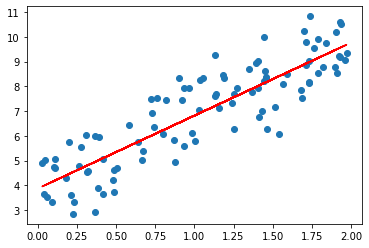

In [ ]:
plt.scatter(x,y)
plt.plot(x, model.predict(x), 'r')
plt.show

In [ ]:
print(f"기울기: {round(a[0],3)}, y절편: {round(b[0],3)}")

기울기: 2.951, y절편: 3.904


3. 결과 비교

 1과 2의 결과를 비교해보고 차이가 있다면, 그 이유를 서술해봅시다. 

 => 결과의 차이가 없습니다.




# Linear Regression (선형 회귀)
선형 회귀를 이용해 캘리포니아 지역의 집 값을 예측하는 문제  


*   교재의 tensorflow 기반 모델 대신 sklearn library를 이용해 간단한 코드로 선형 회귀를 구현할 수 있습니다. 6장 실습 내용과 아래 링크를 참고해 간단한 회귀 문제를 풀어봅시다. 


*   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 




1. 데이터 로드

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

housing = fetch_california_housing()
housing_dt = housing.data
target = housing.target

df = pd.DataFrame(housing_dt, columns=housing.feature_names)
df['price'] = target

2. 데이터 EDA

In [ ]:
print(df.head())
print(df.shape)
print(df.info())
print(df.isnull().sum())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   

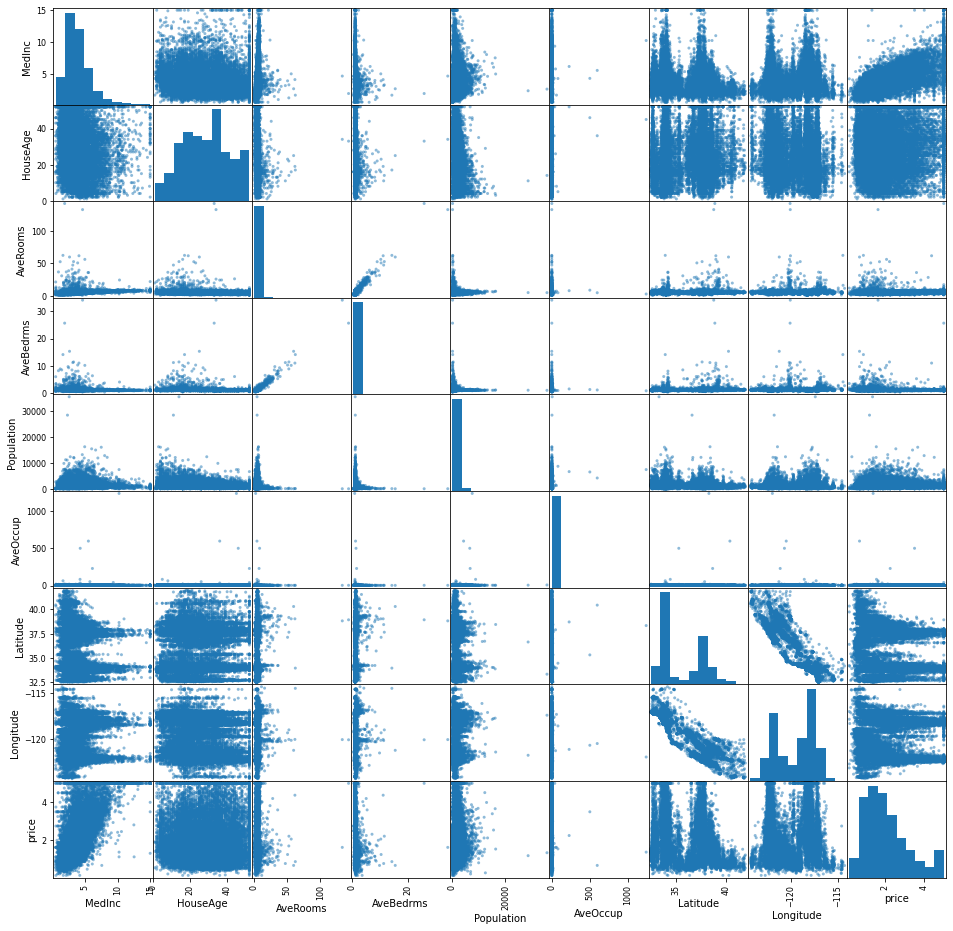

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.5, figsize = (16, 16), diagonal = 'hist')
plt.show()

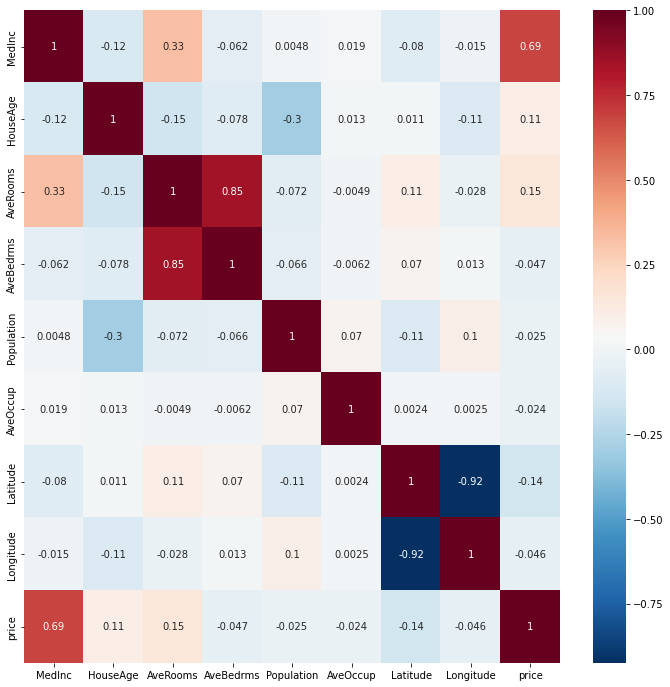

In [ ]:
import seaborn as sns
plt.figure(figsize = (12, 12)) 
df_corr = df.corr(method = 'pearson')
sns.heatmap(df_corr, xticklabels = df.columns, yticklabels=df.columns, cmap = 'RdBu_r', annot=True)
plt.show()

3. 데이터 분할 (8:2)

In [ ]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1].values
y = df['price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16512, 8)
(16512,)
(4128, 8)
(4128,)


4. Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

5. 모델 적합

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

6. 테스트셋 예측

In [ ]:
pred = model.predict(x_test)
print(pred)

[2.28110738 2.79009128 1.90332794 ... 0.8418697  2.7984953  2.21779325]


7. 성능 평가

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

MAE:  0.53513
MSE:  0.52898
RMSE:  0.72731
R2:  0.59432


# 생각해보기

1.   최적의 선을 구할 때 공식을 이용하는 방법과 경사하강법의 차이 및 장단점이 무엇일까요?

  => 공식은 간편하지만 여러 개의 입력값을 처리하는데 한계가 있으며, 경사하강법은 여러 개의 입력값을 처리할 수 있는 반면 적절한 학습률을 설정하는 것이 어렵다는 단점이 있습니다.

2.   다중회귀와 다항회귀의 차이점은 무엇일까요?

  => 다중회귀는 다항의 독립변수가 있는 형태이며, 다항회귀는 독립변수의 차수를 높이는 형태입니다. 
